In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stemgraphic import stem_graphic
from pandas.api.types import CategoricalDtype

In [2]:
def freqs2cases(df, freq_col, cases_cols):
        def itcases():
            for i, row in df.iterrows():
                for j in range(int(row[freq_col])):
                    yield row[cases_cols]
        return pd.DataFrame(itcases())

In [3]:
grau_instrucao = ['ensino fundamental', 'ensino médio', 'superior']
grau_instrucao_tipo = CategoricalDtype(categories=grau_instrucao, ordered=True) #criando variável categórica

df_emprg_orc = pd.read_excel('estatistica.basica.bussab.9ed/Dados_EB.xls',
                      header=1,
                      index_col=0,
                      names=['num','estado_civil','instrucao','filhos','salario','anos','meses','procedencia'],
                      dtype={'instrucao':grau_instrucao_tipo})
df_emprg_orc.index.name = 'Num'
df_emprg_orc['filhos'].fillna(0,inplace=True)
df_emprg_orc['filhos'] = df_emprg_orc['filhos'].astype('int64')

In [4]:
tab_2_5 = df_emprg_orc[df_emprg_orc['estado_civil'] == 'casado'].groupby(df_emprg_orc['filhos'])['filhos'].count()
tab_2_5 = pd.DataFrame(tab_2_5)
tab_2_5.index.name = 'num_filhos zi'
tab_2_5.columns = ['ni']
tab_2_5['ni acum'] = tab_2_5['ni'].cumsum()
tab_2_5['fi'] =  round(tab_2_5['ni']/tab_2_5['ni'].sum(),2)
tab_2_5['100fi'] = tab_2_5['fi'] * 100
tab_2_5['100fi Acum'] = round(tab_2_5['ni acum']/tab_2_5['ni'].sum(),4) * 100
tab_2_5['zi x ni'] = tab_2_5['ni'] * tab_2_5.index
display('Tabela 2.5 Número de Filhos')
tab_2_5

'Tabela 2.5 Número de Filhos'

,ni,ni acum,fi,100fi,100fi Acum,zi x ni
num_filhos zi,,,,,,
0,4,4,0.20,20.0,20.0,0
1,5,9,0.25,25.0,45.0,5
2,7,16,0.35,35.0,80.0,14
3,3,19,0.15,15.0,95.0,9
5,1,20,0.05,5.0,100.0,5


In [5]:
# Exemplo 3.1 
#média de filhos 
display(tab_2_5['zi x ni'].sum()/tab_2_5['ni'].sum())
media_filhos = np.average(tab_2_5.index.values,weights=tab_2_5['ni'])
display(media_filhos)
display((tab_2_5.index*tab_2_5['fi']).sum())


1.65

1.65

1.65

In [6]:
amplitude = 4
bins = range(4,28,amplitude)
bins_medio = [round((bins[i] + bins[i+1])/2,1) for i in range(len(bins)) if i+1 < len(bins)] #pontos médios
tab_2_6 = pd.DataFrame(pd.cut(df_emprg_orc['salario'],bins=range(4,28,4),right=False).value_counts(sort=False))
tab_2_6.columns = ['ni']
tab_2_6['ni acum'] = tab_2_6['ni'].cumsum()
tab_2_6['pt medio si'] = bins_medio
tab_2_6 = tab_2_6.reindex(['pt medio si','ni','ni acum'],axis='columns')

tab_2_6['fi'] = round(tab_2_6['ni']/tab_2_6['ni'].sum(),4)
tab_2_6['100fi'] = tab_2_6['fi']*100
tab_2_6['100fi Acum'] = round(tab_2_6['ni acum']/tab_2_6['ni'].sum(),4) * 100
display('Tabela 2.6 - Salários')
tab_2_6


'Tabela 2.6 - Salários'

,pt medio si,ni,ni acum,fi,100fi,100fi Acum
"[4, 8)",6.0,10,10,0.2778,27.78,27.78
"[8, 12)",10.0,12,22,0.3333,33.33,61.11
"[12, 16)",14.0,8,30,0.2222,22.22,83.33
"[16, 20)",18.0,5,35,0.1389,13.89,97.22
"[20, 24)",22.0,1,36,0.0278,2.78,100.00


In [7]:
#Exemplo 3.2 
metade_amostra = tab_2_6['ni'].sum()/2
classe_mediana = tab_2_6[tab_2_6['ni acum'] >= metade_amostra].iloc[0] #pega primeira classe maior ou igual que a metade
lim_inferior = classe_mediana.name.left
freq_anterior = tab_2_6[tab_2_6['ni acum'] < metade_amostra].iloc[-1]['ni']#pega primeira classe menor que a metade
freq_mediana = classe_mediana['ni']
mediana = round(lim_inferior + (metade_amostra - freq_anterior) * amplitude / freq_mediana,2)
media_salarios=round(np.average(tab_2_6['pt medio si'],weights=tab_2_6['ni']),2)
print(f"Quantidade: {tab_2_6['ni'].sum()}")
print(f"média: {media_salarios}")
print(f"Frequencia Anterior: {freq_anterior}")
print(f"Frequencia Mediana: {freq_mediana}")
print(f"Limite Inferior da Classe Mediana: {lim_inferior}")
print(f'Mediana: {mediana}')

# display(tab_2_6.index.categories.values[0].left)
# display(tab_2_6.index.categories.values[0].right)
# display(tab_2_6.index.categories.values[0])

Quantidade: 36
média: 11.22
Frequencia Anterior: 10.0
Frequencia Mediana: 12.0
Limite Inferior da Classe Mediana: 8
Mediana: 10.67


In [8]:
#Exemplo 3.2 (continuação) Calcular a moda para região de procedência, grau de instrução
#display(df_emprg_orc['procedencia'])
print(f'Moda da Procedência: {df_emprg_orc["procedencia"].mode()}')
print(f'Moda do Grau de Instrução: {df_emprg_orc["instrucao"].mode()}')
#display(df_emprg_orc['instrucao'])
#display(df_emprg_orc['instrucao'].mode())()

Moda da Procedência: 0    outra
dtype: object
Moda do Grau de Instrução: 0    ensino médio
Name: instrucao, dtype: category
Categories (3, object): ['ensino fundamental' < 'ensino médio' < 'superior']


In [9]:
#Exemplo 3.3 
tab_2_5['desvio'] = abs(tab_2_5.index - media_filhos)
tab_2_5['desvio_quadrado'] = pow(tab_2_5.index - media_filhos,2)
print('Tabela 2.5 - Variável Número de filhos')
print(f'Desvio Médio: {round((tab_2_5.desvio * tab_2_5.ni).sum()/tab_2_5.ni.sum(),3)}')
print(f'Variância: {round((tab_2_5.desvio_quadrado * tab_2_5.ni).sum()/tab_2_5.ni.sum(),3)}')
print(f'Desvio Padrão: {round(pow((tab_2_5.desvio_quadrado * tab_2_5.ni).sum()/tab_2_5.ni.sum(),0.5),3)}')

Tabela 2.5 - Variável Número de filhos
Desvio Médio: 0.985
Variância: 1.528
Desvio Padrão: 1.236


In [10]:
#Exemplo 3.4
tab_2_6['desvio'] = abs(tab_2_6['pt medio si'] - media_salarios)
tab_2_6['desvio_quadrado'] = pow(tab_2_6['pt medio si'] - media_salarios,2)
print('Tabela 2.6 - Variável Salários')
print(f'Desvio Médio: {round((tab_2_6.desvio * tab_2_6.ni).sum()/tab_2_6.ni.sum(),3)}')
print(f'Variância: {round((tab_2_6.desvio_quadrado * tab_2_6.ni).sum()/tab_2_6.ni.sum(),3)}')
print(f'Desvio Padrão: {round(pow((tab_2_6.desvio_quadrado * tab_2_6.ni).sum()/tab_2_6.ni.sum(),0.5),3)}')

Tabela 2.6 - Variável Salários
Desvio Médio: 3.716
Variância: 19.395
Desvio Padrão: 4.404


### Problema 1
<p> Quer se estudar o número de erros de impressão de um livro, para isso escolheu-se um amostra de 50 páginas, encontrando
-se o número de erros por página na tabela abaixo</p>
<ol>
<li> Qual o número médio de erros por página
<li> E o número mediano
<li> Qual é o desvio padrão
<li> faça uma representação gráfica da distribuição
<li> Se o livro tem 500 páginas, qual é o número total de erros esperados no livro?
</ol>


'Tabela de Erros'

,erros,ni,ni_acum,ni_x_erros
0,0,25,25,0
1,1,20,45,20
2,2,3,48,6
3,3,1,49,3
4,4,1,50,4


Número Médios de erros: 0.66
Número Mediano: 0.5
Variança: 0.72
Desvio Padrão: 0.85
Quant. de Erros esperados num livro de 500 páginas: 330.0 erros.


[Text(0.5, 1.0, 'Histograma - Quantidade de Erros'),
 Text(0.5, 0, 'Quantidade de Erros'),
 Text(0, 0.5, '')]

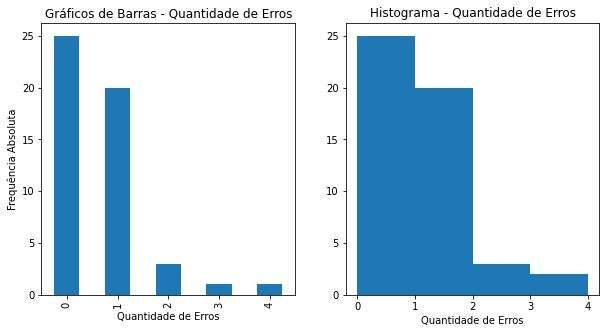

In [11]:
tabela_erros = pd.DataFrame({'erros':[0,1,2,3,4],'ni':[25,20,3,1,1]})
tabela_erros['ni_acum'] = tabela_erros.ni.cumsum()
tabela_erros['ni_x_erros'] = tabela_erros.erros * tabela_erros.ni
tabela_analitica =  freqs2cases(tabela_erros, 'ni', 'erros') #transforma a distribuição de frequencia em dados brutos
media_erros = tabela_analitica.mean()[0]
display('Tabela de Erros')
display(tabela_erros)
print(f'Número Médios de erros: {media_erros}')
mediana_erros = tabela_analitica.median()[0]
print(f'Número Mediano: {mediana_erros}')
varianca_erros = round(tabela_analitica.var()[0],2)
print(f'Variança: {varianca_erros}')
desv_padrao_erros = round(tabela_analitica.std()[0],2)
print(f'Desvio Padrão: {desv_padrao_erros}')
print(f'Quant. de Erros esperados num livro de 500 páginas: {media_erros * 500} erros.')

# fig,ax = plt.subplots(figsize=(10, 6))
fig,axes = plt.subplots(1,2,figsize=(10,5))



tabela_erros.plot(kind='bar',x='erros',y='ni',ax=axes[0],legend=False)
axes[0].set(title='Gráficos de Barras - Quantidade de Erros',xlabel='Quantidade de Erros',ylabel='Frequência Absoluta')
tabela_analitica.plot(kind='hist',bins=[0,1,2,3,4],ax=axes[1],legend=False)
axes[1].set(title='Histograma - Quantidade de Erros',xlabel='Quantidade de Erros',ylabel='')


### Problema 2
<p> As taxas de juros recebidas por 10 ações durante um certo período foram (medidas em porcentagem)
 2.59, 2.64,2.60,2.62,2.57,2.55,2.61,2.50,2.63,2.64. Calcule a média, a mediana e o desvio padrão</p>

In [12]:
taxa_juros = pd.Series([2.59, 2.64,2.60,2.62,2.57,2.55,2.61,2.50,2.63,2.64])
print(f'A média é: {round(taxa_juros.mean(),2)}')
print(f'A mediana é: {round(taxa_juros.median(),2)}')
print(f'O desvio padrão é: {round(taxa_juros.std(),2)}')

A média é: 2.6
A mediana é: 2.6
O desvio padrão é: 0.04


### Problema 3
<p> Para facilitar um projeto de ampliação da rede de esgoto de um certa região de um cidade, as autoridades tomaram uma 
amostra de tamanho 50 do 270 quarteirões que compõem a região e foram encontrados os seguinte números de casas por
quarteirão</p>
<ol>
<li> Use cinco intervalos e constru um histograma
<li> Determine uma medida de posição central e uma medida de dispersão
</ol>

média = 40.42, mediana=31.0, desvio padrão=26.08


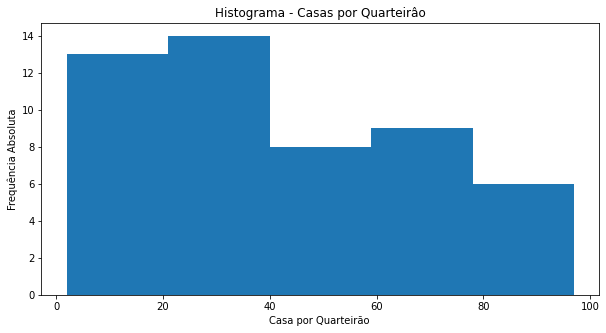

In [13]:
casas_por_quarteirao=[2,2,3,10,13,14,15,15,16,16,
                      18,18,20,21,22,22,23,24,25,25,
                      26,27,29,29,30,32,36,42,44,45,
                      45,46,48,52,58,59,61,61,61,65,
                      66,66,68,75,78,80,89,90,92,97]

df_casas_quart = pd.Series(casas_por_quarteirao)

fig,axes = plt.subplots(figsize=(10,5))
df_casas_quart.plot(kind='hist',bins=5,ax=axes)
axes.set(title='Histograma - Casas por Quarteirâo',xlabel='Casa por Quarteirão ',ylabel='Frequência Absoluta')

media_casas = round(df_casas_quart.mean(),2)
mediana_casas = round(df_casas_quart.median(),2)
desvio_padrao_casas = round(df_casas_quart.std(),2)
print(f"média = {media_casas}, mediana={mediana_casas}, desvio padrão={desvio_padrao_casas}")


### Problema 4.c
<p> Esboce os histogramas de três variaveis (X, Y, Z) com a mesma média aritmética, mas com as variâncias ordenadas em
ordem crescente</p>

<AxesSubplot:ylabel='Frequency'>

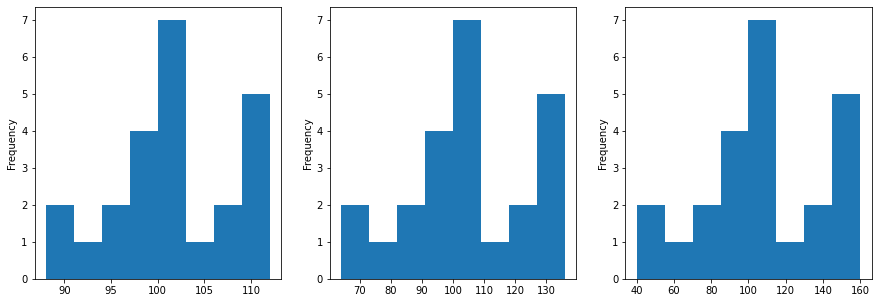

In [14]:
dados = pd.DataFrame({'X':[102,104,106,108,110,112,112,112,112,100,100,100,100,100,100,98,98,98,98,96,94,92,90,88],
                      'Y':[106,112,118,124,130,136,136,136,136,100,100,100,100,100,100,94,94,94,94,88,82,76,70,64],
                      'Z':[110,120,130,140,150,160,160,160,160,100,100,100,100,100,100,90,90,90,90,80,70,60,50,40]})
dados[['X','Y','Z']].var()
dados[['X','Y','Z']].mean()
fig,axes = plt.subplots(1,3,figsize=(15,5))
dados['X'].plot(kind='hist',bins=8,ax=axes[0])
dados['Y'].plot(kind='hist',bins=8,ax=axes[1])
dados['Z'].plot(kind='hist',bins=8,ax=axes[2])

### Problema 7 
<p>Obtenha o esquema de cinco números para o dados do problema 3. Calcule a distância interquartil e as dispersões 
inferior e superior</p>

In [15]:
df = df_casas_quart
print(f'Valor Minimo: {df.min()}')
print(f'1º Quartil: {df.quantile(q=0.25)}')
print(f'Valor Mediano: {df.quantile(q=0.5)}')
print(f'3º Quartil: {df.quantile(q=0.75)}')
print(f'Valor Máximo: {df.max()}')

print(f'Distância Interquartil: {df.quantile(q=0.75) - df.quantile(q=0.25)}')
print(f'Dispersão Inferior: {df.quantile(q=0.25) - df.min()}')
print(f'Dispersão Superior: {df.max() - df.quantile(q=0.75)}')

Valor Minimo: 2
1º Quartil: 20.25
Valor Mediano: 31.0
3º Quartil: 61.0
Valor Máximo: 97
Distância Interquartil: 40.75
Dispersão Inferior: 18.25
Dispersão Superior: 36.0


### Problema 8

<p>Refaça o problema anterior, utilizando desta vez os dados do problema 5, do capitulo 2</p>


In [16]:
#idade
df = df_emprg_orc['anos']
print(f'Valor Minimo: {df.min()}')
print(f'1º Quartil: {df.quantile(q=0.25)}')
print(f'Valor Mediano: {df.quantile(q=0.5)}')
print(f'3º Quartil: {df.quantile(q=0.75)}')
print(f'Valor Máximo: {df.max()}')

print(f'Distância Interquartil: {df.quantile(q=0.75) - df.quantile(q=0.25)}: ')
print(f'Dispersão Inferior: {df.quantile(q=0.25) - df.min()}')
print(f'Dispersão Superior: {df.max() - df.quantile(q=0.75)}')

Valor Minimo: 20
1º Quartil: 30.0
Valor Mediano: 34.5
3º Quartil: 40.0
Valor Máximo: 48
Distância Interquartil: 10.0: 
Dispersão Inferior: 10.0
Dispersão Superior: 8.0


### Problema 9

<p>Obter os 3 quartis, q(0,1), q(0,90) para os dados do problema 3 (casas por quarteirão)</p>

In [17]:
q1 = df_casas_quart.quantile(0.25)
q2 = df_casas_quart.quantile(0.5)
q3 = df_casas_quart.quantile(0.75)
q_10 = df_casas_quart.quantile(0.1)
q_90 = df_casas_quart.quantile(0.9)
print(f'Quartis (1={q1}) (2={q2}) (3={q3}) (10%={q_10}) (90%={q_90})')

Quartis (1=20.25) (2=31.0) (3=61.0) (10%=13.9) (90%=78.2)


### Problema 10

<p>Para a variável população do CD-Brasil obetenha q(0.10), q(0.25), q(0.50), q(0.75), q(0.80), q(0.95)</p>

In [18]:
df_cd_brasil =  pd.read_excel('estatistica.basica.bussab.9ed/CD-Brasil.xls',
                      header=4,
                      names=['regiao','uf','superficie','populacao','densidade'])
filtro = (df_cd_brasil['uf'] == 'Subtot') | (df_cd_brasil['uf'] == 'Total')
df_cd_brasil = df_cd_brasil[~filtro] #retira os Subtotais e totais
df_cd_brasil['regiao'].fillna(method='ffill',inplace=True) #preenche as regiões vazias com a anterior

q1 = df_cd_brasil['populacao'].quantile(0.25)
q2 = df_cd_brasil['populacao'].quantile(0.5)
q3 = df_cd_brasil['populacao'].quantile(0.75)
q_10 = df_cd_brasil['populacao'].quantile(0.1)
q_80 = df_cd_brasil['populacao'].quantile(0.8)
q_95 = df_cd_brasil['populacao'].quantile(0.95)
print(f'Quartis (1={q1}) (2={q2}) (3={q3}) (10%={q_10})  (80%={q_80}) (95%={q_95})')
display(df_cd_brasil['populacao'].count())

Quartis (1=2360858.0) (2=3351669.0) (3=8335944.0) (10%=1007530.2)  (80%=9924930.0) (95%=18117608.099999998)


27

In [19]:
#Exemplo 3.8


df_cd_municipio =  pd.read_excel('estatistica.basica.bussab.9ed/CD-Municipios.xls',
                    header=0,
                      names=['num','municipio','populacao'],
                      index_col=0)
maiores_cidades_15 = df_cd_municipio.sort_values(by='populacao',ascending=False).head(15)
q1 = maiores_cidades_15['populacao'].quantile(0.25)
q2 = maiores_cidades_15['populacao'].quantile(0.5)
q3 = maiores_cidades_15['populacao'].quantile(0.75)
minimo = maiores_cidades_15['populacao'].min()
maximo = maiores_cidades_15['populacao'].max()
print(f'Quartis (1={q1}) (2={q2}) (3={q3}, mínimo:{minimo}, máximo:{maximo}')

Quartis (1=109.15) (2=135.8) (3=206.2, mínimo:84.7, máximo:988.8


[Text(0.5, 1.0, 'Box Plot - Quinze Maiores Cidades do Brasil'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'população (mil)'),

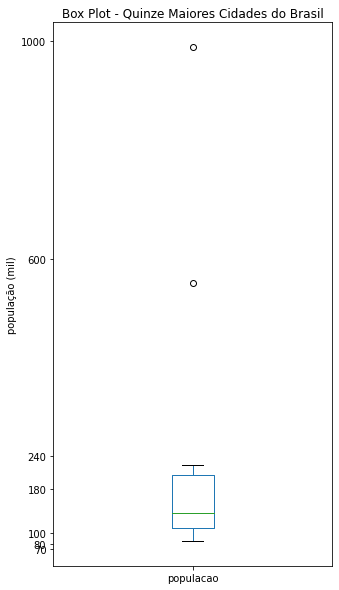

In [20]:
fig,axes = plt.subplots(figsize=(5,10))
maiores_cidades_15.plot(kind='box',ax=axes)
yticks = [70,80,100,180,240,600,1000]
axes.set(title='Box Plot - Quinze Maiores Cidades do Brasil',
            xlabel='',
            ylabel='população (mil)',
            yticks=yticks)

[Text(0.5, 1.0, 'Box Plot - 30 Cidades do Brasil'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'população (mil)')]

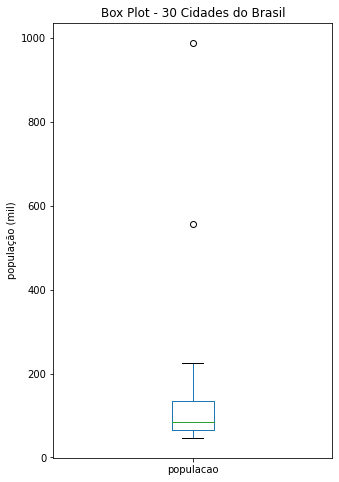

In [21]:
fig,axes = plt.subplots(figsize=(5,8))
df_cd_municipio['populacao'].plot(kind='box',ax=axes)
#yticks = [70,80,100,180,240,600,1000]
axes.set(title='Box Plot - 30 Cidades do Brasil',
            xlabel='',
            ylabel='população (mil)')

### Problema 11

<p>Construa o box plot para os dados do Exemplo 2.3, capítulo 2. O que você pode concluir a respeito da distribuição?</p>

[Text(0.5, 1.0, 'Box Plot - Salários dos 36 empregados da Seção de Orçamento'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Qt de Salários Mínimos')]

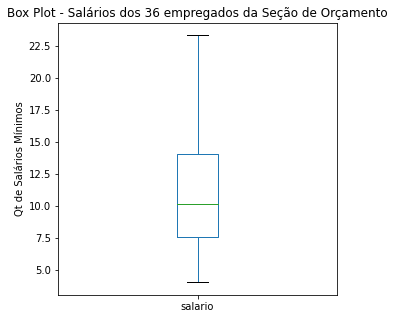

In [22]:
fig,axes = plt.subplots(figsize=(5,5))
df_emprg_orc['salario'].plot(kind='box',ax=axes)
axes.set(title='Box Plot - Salários dos 36 empregados da Seção de Orçamento',
            xlabel='',
            ylabel='Qt de Salários Mínimos')

### Problema 12

<p>Refaça a questão anterior com os dados do Problema 3 deste capítulo</p>

[Text(0.5, 1.0, 'Box Plot - Casas por Quarteirão'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Qt Casas por Quarteirão')]

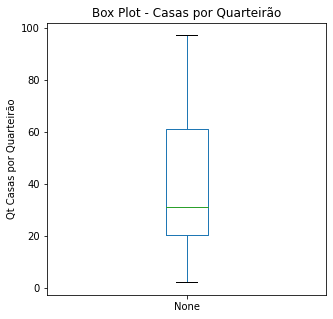

In [23]:
fig,axes = plt.subplots(figsize=(5,5))
df_casas_quart.plot(kind='box',ax=axes)
axes.set(title='Box Plot - Casas por Quarteirão',
            xlabel='',
            ylabel='Qt Casas por Quarteirão')

### Problema 13

<p>Faça um box plot para o problema 10. Comente sobre a simetria, caudas e presença de valores atípicos</p>

[Text(0.5, 1.0, 'Box Plot - População por Uf Brasil'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'População por Uf')]

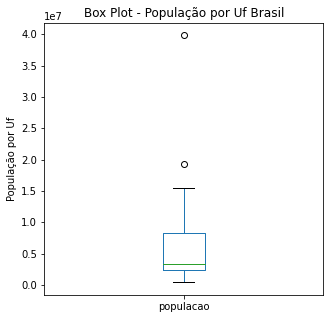

In [24]:
fig,axes = plt.subplots(figsize=(5,5))
df_cd_brasil['populacao'].plot(kind='box')
axes.set(title='Box Plot - População por Uf Brasil',
            xlabel='',
            ylabel='População por Uf')

[Text(0.5, 1.0, 'p=1/3')]

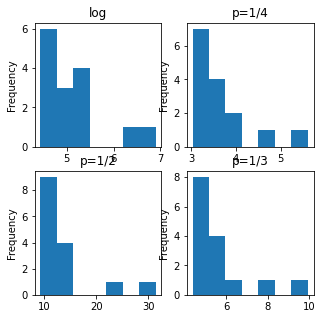

In [25]:
#exemplo 3.10 (transforamções)
# df = df_cd_municipio
df = maiores_cidades_15
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(5,5))
#p=0 (log)
(np.log(df['populacao'])).plot(kind='hist',bins=7,ax=axes[0,0])
axes[0,0].set(title='log')
#p = 1/4
(df['populacao']**0.25).plot(kind='hist',bins=7,ax=axes[0,1])
axes[0,1].set(title='p=1/4')
#p=1/2
(df['populacao']**0.5).plot(kind='hist',bins=7,ax=axes[1,0])
axes[1,0].set(title='p=1/2')
#p=1/3
(df['populacao']**0.333).plot(kind='hist',bins=7,ax=axes[1,1])
axes[1,1].set(title='p=1/3')
    # maiores_cidades_15['populacao'].plot(kind='hist',bins=7)

[Text(0.5, 1.0, 'p=1/3')]

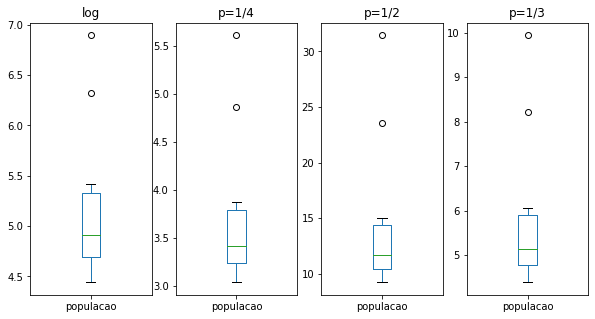

In [26]:
#exemplo 3.10 (transforamções)
# df = df_cd_municipio
df = maiores_cidades_15
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,5))
#p=0 (log)
(np.log(df['populacao'])).plot(kind='box',ax=axes[0])
axes[0].set(title='log')
#p = 1/4
(df['populacao']**0.25).plot(kind='box',ax=axes[1])
axes[1].set(title='p=1/4')
#p=1/2
(df['populacao']**0.5).plot(kind='box',ax=axes[2])
axes[2].set(title='p=1/2')
#p=1/3
(df['populacao']**0.333).plot(kind='box',ax=axes[3])
axes[3].set(title='p=1/3')
    # maiores_cidades_15['populacao'].plot(kind='hist',bins=7)

Medidas descritivas para CD-Notas


count    100.00000
mean       5.92500
std        1.81238
min        1.50000
25%        4.87500
50%        6.00000
75%        7.12500
max       10.00000
dtype: float64

,A,B
90,-4.0,-10.0
65,-4.0,-10.0
95,-4.0,-10.0
11,-3.5,-9.5
29,-3.0,-9.0
...,...,...
51,3.0,-3.0
85,3.5,-2.5
81,3.5,-2.5
9,3.5,-2.5


Distância Interquartil 2.25


<AxesSubplot:>

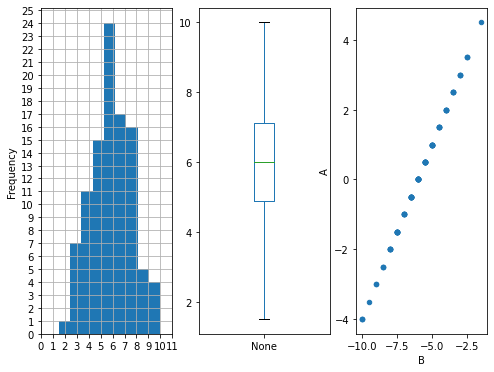

In [27]:
#exemplo 2.10 (continuação)
df_cd_notas = pd.read_excel('estatistica.basica.bussab.9ed/CD-Notas.xls',                            
                            squeeze=True,
                           names = range(10),
                           skiprows=[0,1,2])

df_cd_notas = pd.concat([df_cd_notas[0],
           df_cd_notas[1],
           df_cd_notas[2],
           df_cd_notas[3],
           df_cd_notas[4],
           df_cd_notas[5],
           df_cd_notas[6],
           df_cd_notas[7],
           df_cd_notas[8],
           df_cd_notas[9]])
df_cd_notas.reset_index(drop=True,inplace=True)

fig,axes = plt.subplots(nrows=1,ncols=3)

df_cd_notas.plot(kind='hist',
                 bins=9,
                 xticks=range(12),
                 yticks=range(26),
                 grid=True,
                 figsize=(8,6),
                 ax=axes[0])
print('Medidas descritivas para CD-Notas')
df_describe = df_cd_notas.describe()
display(df_describe)
mediana = df_describe['50%']
df_scatter = pd.DataFrame(mediana - df_cd_notas,columns=['A'])
df_scatter.sort_values('A',inplace=True)
df_scatter['B'] = pd.DataFrame(df_scatter['A'] - mediana)
display(df_scatter)
# df_scatter.plot(kind='scatter',x=df_scatter['A'],y=df_scatter['B'],ax=axes[2])
df_scatter.plot(kind='scatter',x='B',y='A',ax=axes[2])
print(f'Distância Interquartil {df_describe["75%"] - df_describe["25%"]}')
df_cd_notas.plot(kind='box',ax=axes[1])

<AxesSubplot:xlabel='0', ylabel='1'>

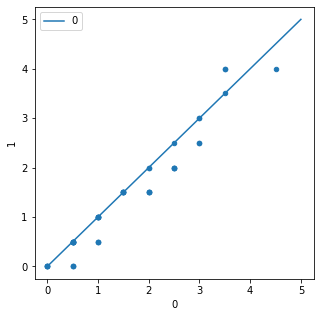

In [40]:
#gráficos de dispersão
import math
fig,axes = plt.subplots(figsize=(5,5))
df = df_cd_notas.sort_values()
df.sort_values(inplace=True)      #Ordena as notas
df = df.reset_index(drop=True)    #reseta os indices
tamanho = df.count()
mediana = df.median()


#df.drop(df.index[-1],inplace=True) #testa para tamanho impar


if tamanho % 2:                     #se a quantidade de items for par
    display('impar')
    df.iloc[0:math.ceil(tamanho%2)]
    #como o tamanho é impar, o slice vai até ceil(metade do tamanho), próximo inteiro após a metade
    df_a = (mediana - df.iloc[0:math.ceil(tamanho/2)]).reset_index(drop=True)  #gera uma serie com a primeira metade
    #como o tamanho é impar, o slice começa de floor(metade do tamanho), primeiro inteiro antes da metade
    df_b = (df.iloc[math.floor(tamanho/2):].sort_values(ascending=False) - mediana).reset_index(drop=True)
else:
    df_a = (mediana - df.iloc[0:int(tamanho/2)]).reset_index(drop=True)  #gera uma serie com a primeira metade
    #gera uma Serie com a segunda metade e inverte a ordem (para que o ultimo corresponda ao primeiro da Series anterior)
    df_b = (df.iloc[int(tamanho/2):].sort_values(ascending=False) - mediana).reset_index(drop=True)
    #gera um data frame para gerar um gráfico de linha(linha do grafico tipo y=x)
    df_line = pd.DataFrame(np.arange(int(df_b.max() + 2)))
df_scatter = pd.concat([df_a,df_b],axis=1) #concatena as duas Series
df_scatter.plot(kind='scatter',x=0,y=1,ax=axes)  #gera o grafico de dispersão

df_line.plot(kind='line',ax=axes)  #gera o gráfico do tipo y=x na mesma figura do gráfico de dispersão
    